## Model Training Explanation
This notebook is about training 1 Model C with RGB Images.

In [52]:
from importlib import reload

import vpc_cnn_c
import vpc_data

reload(vpc_cnn_c)
reload(vpc_data)

<module 'vpc_data' from 'c:\\Universidade\\vpc\\VPC-TP\\src\\single_model_C_rgb\\vpc_data.py'>

In [2]:
X_train, y_train, X_val, y_val = vpc_data.load_training_data(validation_split=0.2)

Loading Training data from 43 directories
Training images loaded. Shuffling data.
X_train_gray.shape (31367, 30, 30, 3)
X_valid_gray.shape (7842, 30, 30, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [3]:
model_c_rgb = vpc_cnn_c.CNN_C_RGB("ModelCRGB", img_size=30, channels=3)

Model: "ModelCRGB"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30, 30, 3)]       0         
_________________________________________________________________
resizing (Resizing)          (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       36992     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       14

In [4]:
model_c_rgb.train( X_train, y_train, X_val, y_val, epochs=120, stop_early=True)

Epoch 1/120
981/981 [==============================] - 20s 17ms/step - loss: 1.3439 - accuracy: 0.6620 - val_loss: 0.0969 - val_accuracy: 0.9754

Epoch 00001: val_loss improved from inf to 0.09692, saving model to saved_models\ModelCRGB
INFO:tensorflow:Assets written to: saved_models\ModelCRGB\assets
Epoch 2/120
981/981 [==============================] - 18s 18ms/step - loss: 0.1959 - accuracy: 0.9426 - val_loss: 0.0480 - val_accuracy: 0.9878

Epoch 00002: val_loss improved from 0.09692 to 0.04797, saving model to saved_models\ModelCRGB
INFO:tensorflow:Assets written to: saved_models\ModelCRGB\assets
Epoch 3/120
981/981 [==============================] - 16s 16ms/step - loss: 0.1086 - accuracy: 0.9674 - val_loss: 0.0325 - val_accuracy: 0.9916

Epoch 00003: val_loss improved from 0.04797 to 0.03253, saving model to saved_models\ModelCRGB
INFO:tensorflow:Assets written to: saved_models\ModelCRGB\assets
Epoch 4/120
981/981 [==============================] - 17s 17ms/step - loss: 0.0893 - 

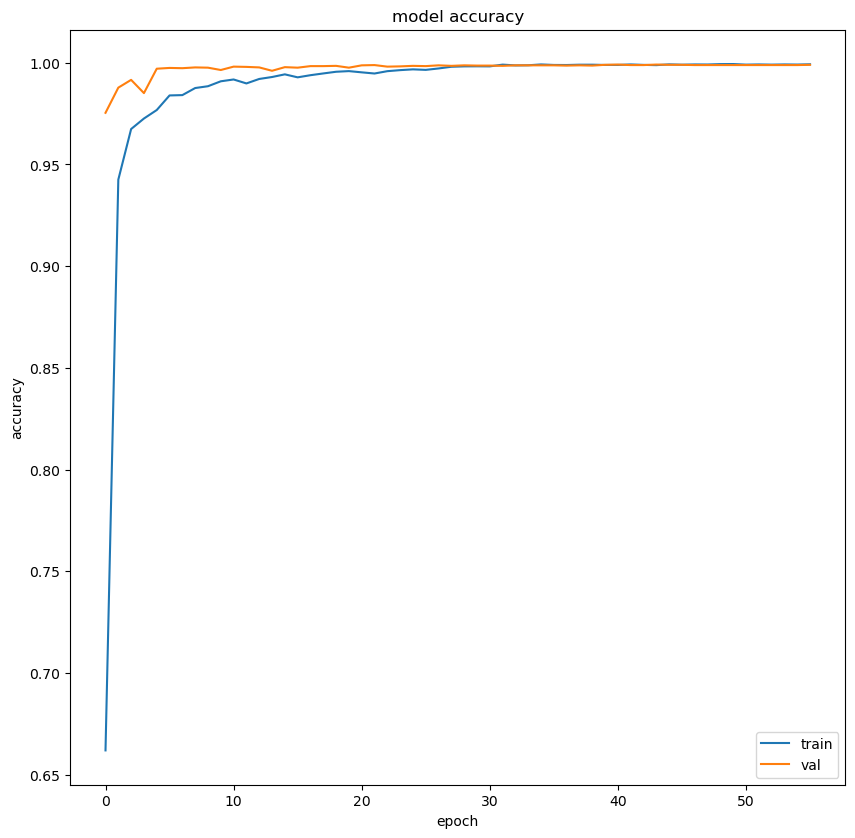

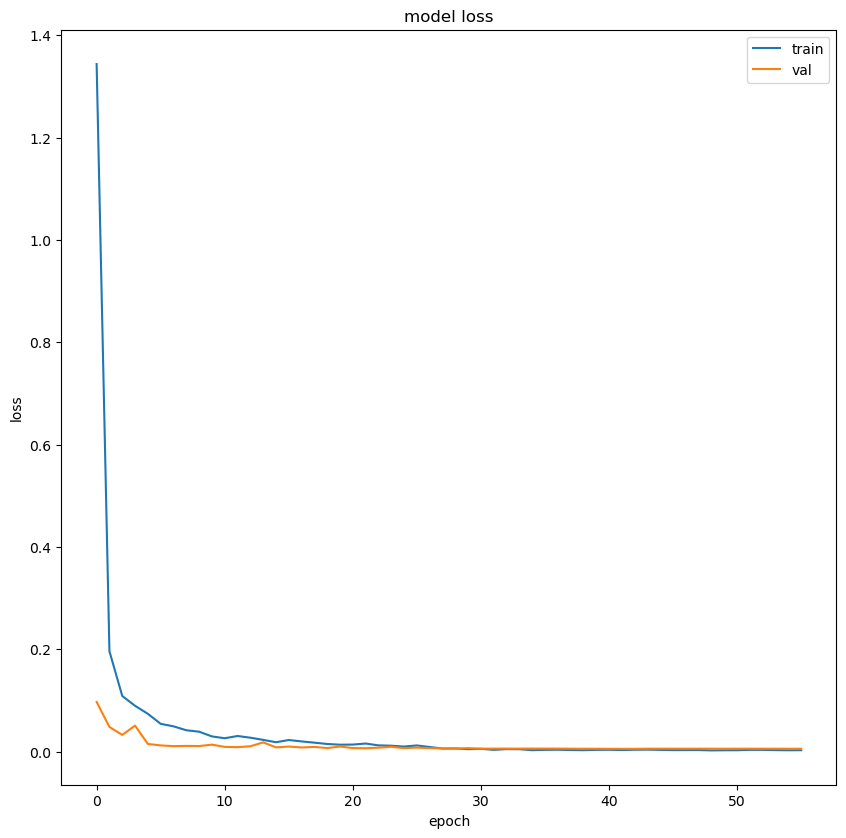

In [5]:
model_c_rgb.plot_history()

In [6]:
X_test, y_test = vpc_data.load_testing_data()

Loading testing data from 43 directories
Test images loaded.
test_gray data shape:  (12630, 30, 30, 3)
test_labels shape:  (12630,)


Test Data accuracy:  99.07363420427554
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      1.00      1.00       720
           2       1.00      1.00      1.00       750
           3       0.99      0.98      0.99       450
           4       1.00      1.00      1.00       660
           5       0.98      1.00      0.99       630
           6       1.00      0.98      0.99       150
           7       1.00      1.00      1.00       450
           8       1.00      0.97      0.98       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.99      0.99      0.99       420
          12       1.00      0.96      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      1.00      1.00       270
          15       0.93      1.00      0.96       210
          16       0.99      1.00      1.0

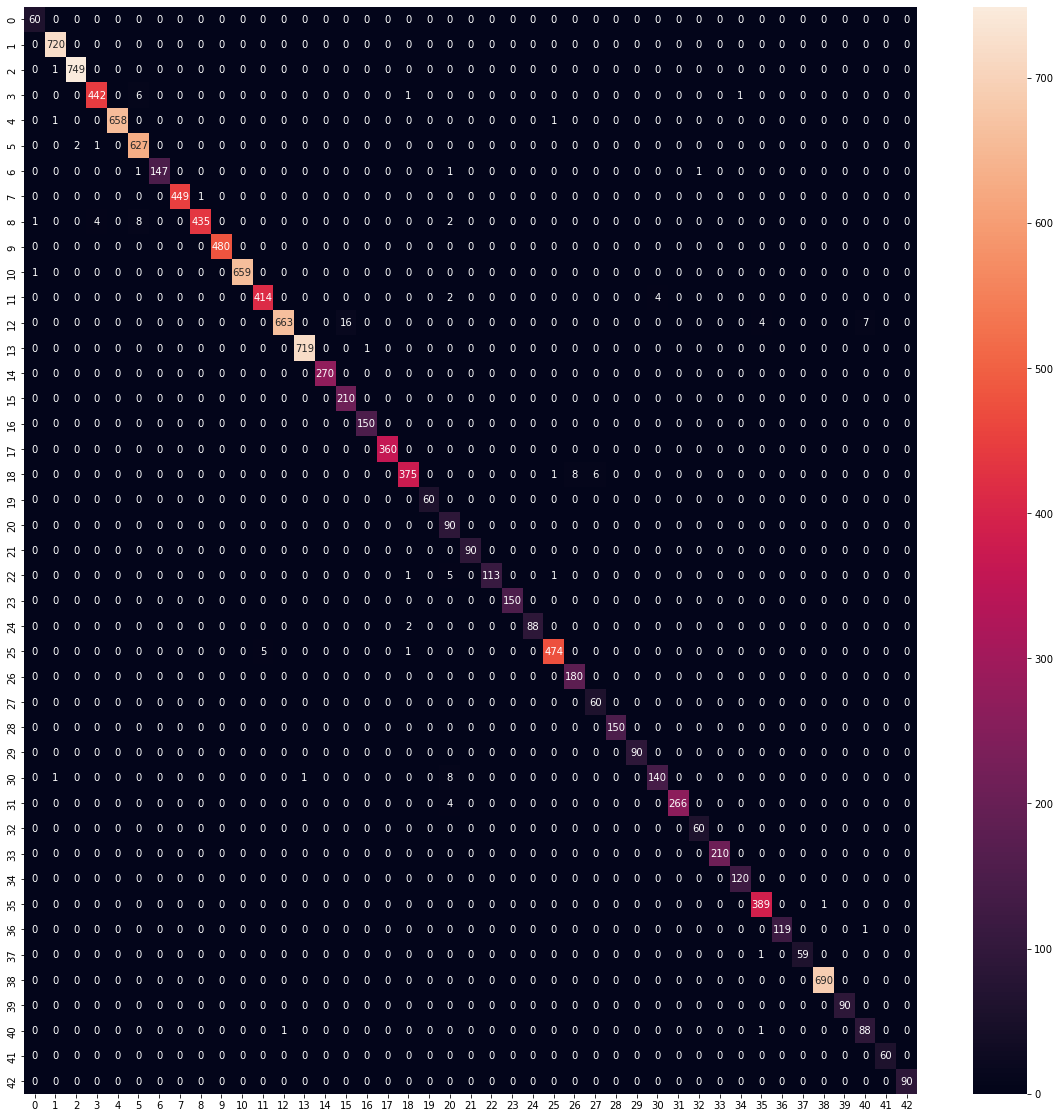

In [7]:
model_c_rgb.evaluate(X_test, y_test)

In [53]:
loaded_model_c_rgb =  vpc_cnn_c.CNN_C_RGB("ModelCRGB", img_size=30, channels=3)

Model: "ModelCRGB"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 30, 30, 3)]       0         
_________________________________________________________________
resizing_7 (Resizing)        (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 26, 26, 128)       36992     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 13, 13, 128)       512       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 11, 11, 128)       14

In [54]:
loaded_model_c_rgb.load()

In [55]:
loaded_model_c_rgb.evaluate_error(X_test, y_test)

Test Data error/loss:  0.05128573413317
